### 导入需要的工具包并创建工具类

In [1]:
from  nlp_toolbox import NLPTools
from wb_toolbox import WeiboSpiderTool
import tqdm
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
weibo = WeiboSpiderTool()
nlp = NLPTools()

### 首先设定好本次分析任务的事件关键词

In [3]:
topic = '永州'

### 爬取目标用户信息，目标用户的用户Id和爬取范围我们已经在配置文件中设定好了

In [4]:
# weibo.get_users_info()

### 观察爬取到的用户信息

In [5]:
user_weibo = pd.read_csv(r'C:\Users\51694\PycharmProjects\web_scraper\users\东方今报\1672519561.csv')

In [6]:
user_weibo

,id,bid,正文,头条文章url,原始图片url,视频url,位置,日期,工具,点赞数,评论数,转发数,话题,@用户
0,4542528239444596,JhQlVDCYc,【直播｜#飓风劳拉扑向美国能源重镇# 当地红十字会已收容数千人躲避】据美国国家飓风中心消息，...,NaN,NaN,NaN,NaN,2020-08-27 14:02:27,微博原生直播,10,1,1,"飓风劳拉扑向美国能源重镇,飓风劳拉在美国南部登陆",东方今报
1,4542539170054508,JhQDz0eba,【#四川冕宁248国道发生山体垮塌# 致交通中断 】8月26日至27日，凉山州冕宁县境内，2...,NaN,NaN,http://f.video.weibocdn.com/jTYVVuhYlx07FXHVaM...,NaN,2020-08-27 14:20:27,新版微博 weibo.com,1,2,1,四川冕宁248国道发生山体垮塌,东方今报
2,4542529872330996,JhQoz9MoI,【广西#男子杀前妻埋化粪池后去旅游#，转走前妻卡里的15万元】#去前夫家陪儿子遇害女子被埋化...,NaN,NaN,https://gslb.miaopai.com/stream/3vPTfrx-zlyop~...,NaN,2020-08-27 14:02:27,Android,83,21,6,"男子杀前妻埋化粪池后去旅游,去前夫家陪儿子遇害女子被埋化粪池",一手Video
3,4542528924421060,JhQn2iy7q,#三轮车闯红灯撞上宾利需赔款50万# 【雪上加霜！三轮车被宾利撞倒甩出10米远，却要赔宾利车...,NaN,NaN,http://f.video.weibocdn.com/vbNNmU1Dlx07FXwB0b...,NaN,2020-08-27 14:02:27,Android,46,13,3,三轮车闯红灯撞上宾利需赔款50万,易视频
4,4542509584220176,JhPRQhHRm,【#官方回应青岛不明异味#：石化污水处理循环水塔装置存油气漏点】据青岛市环境保护局李沧分局官...,NaN,https://wx4.sinaimg.cn/large/63b09f89ly1gi594m...,NaN,NaN,2020-08-27 13:02:27,iPhone客户端,4,0,2,官方回应青岛不明异味,李沧环保
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,4541075949364577,JhezwDi9z,【#日媒要求日本政府公开新冠对策专家会议实录# 却得到被涂黑的速记记录】近日，日本富士电视台...,NaN,NaN,http://gslb.miaopai.com/stream/9Hg-UTWFAQDVaUI...,NaN,2020-08-23 12:00:00,iPhone客户端,4,3,4,日媒要求日本政府公开新冠对策专家会议实录,NaN
131,4541071579415404,JhestDvnm,#美军胡德堡基地一名核生化专家失踪#【美胡德堡基地再现诡谲事件 年轻核生化专家神秘失踪】 8...,NaN,NaN,http://gslb.miaopai.com/stream/rs-iGqPSnlkWYeq...,NaN,2020-08-23 12:00:00,iPhone客户端,7,5,5,美军胡德堡基地一名核生化专家失踪,NaN
132,4541033294078585,JhdsJh71D,【#两名医学生跪地救人无效却遭恶评# 逝者家属：必须要说感谢】8月14日晚，一位中年男子在湖...,NaN,NaN,http://gslb.miaopai.com/stream/qsmbeFtVwkBozvL...,NaN,2020-08-23 12:00:00,Android,537,70,89,两名医学生跪地救人无效却遭恶评,NaN
133,4541010543378591,JhcS2eaVp,#国是论坛#【#31省区市新增境外输入12例#，#31省区市连续7天本土0新增#】8月22日...,NaN,https://wx3.sinaimg.cn/large/63b09f89ly1gi0gyv...,NaN,NaN,2020-08-23 12:00:00,Android,1,0,1,"国是论坛,31省区市新增境外输入12例,31省区市连续7天本土0新增",NaN


### 展示爬取到的用户信息的统计情况

In [7]:
user_weibo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
id         135 non-null int64
bid        135 non-null object
正文         135 non-null object
头条文章url    1 non-null object
原始图片url    33 non-null object
视频url      94 non-null object
位置         0 non-null float64
日期         135 non-null object
工具         135 non-null object
点赞数        135 non-null int64
评论数        135 non-null int64
转发数        135 non-null int64
话题         126 non-null object
@用户        55 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 14.9+ KB


### 利用我们事先定义好的事件关键词，对微博进行筛选

In [8]:
user_weibo_topic = user_weibo[user_weibo['正文'].str.contains(topic)]
user_weibo_topic[['正文']]

,正文
25,【解除刑拘！不能让防卫者缩手缩脚】今天（8月26日）有媒体报道说，湖南省永州市冷水滩公安分局...
33,【#踹伤猥亵男男生被解除刑拘#，父亲：26日凌晨到家今天吃团圆饭】“孩子26日凌晨1点到的家...
35,【#父亲谈踹伤猥亵男的男生现状#：已回家 身体状况良好】8月26日，永州市公安局通报，已责令...
36,【#永州公安重新调查男子踹伤猥亵男案#，#踹伤猥亵男男生被解除刑拘#】据永州新闻网，记者从永...
52,【#被刑拘男同学父亲痛哭发声#：担心儿子前途，后悔没有答应赔偿】近日，湖南永州，17岁女生李...
76,【#警方通报男生踢伤猥亵男被刑拘#：故意伤害案】据@冷水滩公安 ：8月21日，湖南永州冷水滩...
84,【#男生踹伤猥亵女生男子被刑拘# 警方：猥亵男受伤是事实】#警方回应踹伤猥亵男遭刑拘# 湖南...
86,【#男生踹伤猥亵女生男子被刑拘#，警方：故意伤害罪，非见义勇为】近日，湖南永州。女生在商场被...
94,【#男生踹伤猥亵女生男子被刑拘#，当事女生哭诉：对不起同学，你本该被表扬】6月1日，湖南永州...


### 爬取每篇新闻微博下的热点评论

In [9]:
# for bid in tqdm.tqdm(user_weibo_topic['bid'], desc='Weibo'):
#     weibo.get_wb_comment(bid)

In [10]:
comment_dir = r'C:\Users\51694\PycharmProjects\web_scraper\comment\yongzhou'
comments_ids = os.listdir(comment_dir)

In [11]:
comments = pd.read_csv(os.path.join(comment_dir, comments_ids[0]))
comments

,评论者主页,评论者昵称,评论者性别,评论者所在地,评论者微博数,评论者关注数,评论者粉丝数,评论内容,评论获赞数,评论发布时间
0,https://weibo.cn//nieyinghui,尖灬果儿,女,山东,246,708,499,被骂了知道重新调查了？网络治国？,213,2020-08-26 08:35
1,https://weibo.cn//u/6127766541,大侠向黄昏,男,北京,141,68,57,网络治国太悲哀了,139,2020-08-26 08:38
2,https://weibo.cn//u/7118121041,是孟亦田,女,澳门,1128,304,17825,今天的中国没有微博会什么样？不敢想象…,75,2020-08-26 08:36
3,https://weibo.cn//YY51022,明朗为夏臻唯陆,女,云南,546,76,83,回复@是孟亦田:现在好都冤案重审，只是我们不知道。,0,2020-08-26 18:00
4,https://weibo.cn//u/7335322237,卑微小明在线哔哔,男,湖南,7,21,44,回复@我是段承轩:这个不算 因为当时警方是占他那边 而且他本来也就是胜诉的情况下提出...,0,2020-08-26 16:24
...,...,...,...,...,...,...,...,...,...,...
85,https://weibo.cn//u/5664017602,久久久久best医植菜,男,其他,281,437,131,之前洗地的那些永州专业人士（检察官、律师、警察……）脸疼不疼,43,2020-08-26 08:37
86,https://weibo.cn//u/6990105775,六道子降龙木,女,其他,64,64,1,网络治国,1,2020-08-26 08:37
87,https://weibo.cn//u/7118121041,是孟亦田,女,澳门,1128,304,17825,今天的中国没有微博会什么样？不敢想象…,75,2020-08-26 08:36
88,https://weibo.cn//nieyinghui,尖灬果儿,女,山东,246,708,499,被骂了知道重新调查了？网络治国？,213,2020-08-26 08:35


### 对评论进行情感分析

In [12]:
sentiments = nlp.sentiment_predict(comments['评论内容'], kernel='snow')
comments['sentiments'] = sentiments
print(f"正面评论数:{sentiments.count('positive')}, 负面评论数{sentiments.count('negative')}")

正面评论数:33, 负面评论数57


In [43]:
positive_nums = []
negative_nums = []
bids = [bid.split('.')[0] for bid in comments_ids]
min_comment_times = []
all_comments = []
for wid in tqdm.tqdm(comments_ids):
    comments = pd.read_csv(os.path.join(comment_dir, wid))
    sentiments = nlp.sentiment_predict(comments['评论内容'], kernel='snow')
    comments['sentiments'] = sentiments
    all_comments.append(comments)
    positive_nums.append(sentiments.count('positive'))
    negative_nums.append(sentiments.count('negative'))
    min_comment_times.append(comments['评论发布时间'].min())

100%|███████████████████████████████████| 9/9 [00:24<00:00,  2.75s/it]


In [94]:
positive_nums = []
negative_nums = []
bids = [bid.split('.')[0] for bid in comments_ids]
min_comment_times = []
all_comments = []
for wid in tqdm.tqdm(comments_ids):
    comments = pd.read_csv(os.path.join(comment_dir, wid))
    all_comments.append(comments)
    positive_nums.append(comments['senta_sentiments'].tolist().count('positive'))
    negative_nums.append(comments['senta_sentiments'].tolist().count('negative'))
    min_comment_times.append(comments['评论发布时间'].min())

100%|██████████████████████████████████| 9/9 [00:00<00:00, 192.00it/s]


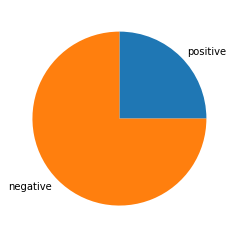

In [69]:
plt.pie(x=[positive_nums[1], negative_nums[1]], labels=['positive', 'negative'])
plt.show()

In [70]:
merge_df = pd.merge(user_weibo_topic, pd.DataFrame(data={'bid':bids, 'positive_comment':positive_nums, 'negative_comment': negative_nums, "comment_time":min_comment_times}), on='bid')
merge_df

,id,bid,正文,头条文章url,原始图片url,视频url,位置,日期,工具,点赞数,评论数,转发数,话题,@用户,positive_comment,negative_comment,comment_time
0,4542220781233735,JhIm25aWX,【解除刑拘！不能让防卫者缩手缩脚】今天（8月26日）有媒体报道说，湖南省永州市冷水滩公安分局...,NaN,https://wx2.sinaimg.cn/large/63b09f89ly1gi4by9...,NaN,NaN,2020-08-26 18:02:30,iPhone客户端,1665,296,60,"踹伤猥亵男男生被解除刑拘,被刑拘男同学父亲痛哭发声",NaN,35,173,2020-08-26 17:16
1,4542121832621835,JhFMrb03F,【#踹伤猥亵男男生被解除刑拘#，父亲：26日凌晨到家今天吃团圆饭】“孩子26日凌晨1点到的家...,NaN,https://wx3.sinaimg.cn/large/63b09f89ly1gi40jc...,NaN,NaN,2020-08-26 15:02:41,iPhone客户端,107284,3738,3630,"踹伤猥亵男男生被解除刑拘,永州公安重新调查男子踹伤猥亵男案","东方今报,东方今报",137,253,2020-08-26 10:43
2,4542118993082750,JhFHRcVXM,【#父亲谈踹伤猥亵男的男生现状#：已回家 身体状况良好】8月26日，永州市公安局通报，已责令...,NaN,NaN,http://f.video.weibocdn.com/1QdjDITvlx07FVLNYr...,NaN,2020-08-26 15:02:41,深度报道 · 视频社区,451,29,21,"父亲谈踹伤猥亵男的男生现状,永州公安重新调查男子踹伤猥亵男案",紧急呼叫,7,21,2020-08-26 10:31
3,4542089927073056,JhEWYtG1y,【#永州公安重新调查男子踹伤猥亵男案#，#踹伤猥亵男男生被解除刑拘#】据永州新闻网，记者从永...,NaN,https://wx3.sinaimg.cn/large/63b09f89ly1gi3wxn...,NaN,NaN,2020-08-26 15:02:41,Android,1028,106,103,"永州公安重新调查男子踹伤猥亵男案,踹伤猥亵男男生被解除刑拘",NaN,11,79,2020-08-26 08:35
4,4541876629930049,JhzoWFFg5,【#被刑拘男同学父亲痛哭发声#：担心儿子前途，后悔没有答应赔偿】近日，湖南永州，17岁女生李...,NaN,NaN,http://f.video.weibocdn.com/qHxQJS4plx07FUN6PI...,NaN,2020-08-25 12:00:00,微博视频,28117,1915,1320,被刑拘男同学父亲痛哭发声,东方今报,62,377,2020-08-25 18:30
5,4541738531957869,JhvOd8dkx,【#警方通报男生踢伤猥亵男被刑拘#：故意伤害案】据@冷水滩公安 ：8月21日，湖南永州冷水滩...,NaN,https://wx4.sinaimg.cn/large/63b09f89ly1gi2skh...,NaN,NaN,2020-08-25 12:00:00,iPhone客户端,23879,1439,801,NaN,冷水滩公安,61,383,2020-08-25 09:20
6,4541590288474761,JhrX6zyFH,【#男生踹伤猥亵女生男子被刑拘# 警方：猥亵男受伤是事实】#警方回应踹伤猥亵男遭刑拘# 湖南...,NaN,NaN,https://gslb.miaopai.com/stream/Ys~aqQ3ZRTmN3M...,NaN,2020-08-24 12:00:00,iPhone客户端,26440,1991,1399,NaN,一手Video,53,389,2020-08-24 23:34
7,4541577172888033,JhrBXc7jb,【#男生踹伤猥亵女生男子被刑拘#，警方：故意伤害罪，非见义勇为】近日，湖南永州。女生在商场被...,NaN,https://wx3.sinaimg.cn/large/63b09f89ly1gi2a24...,NaN,NaN,2020-08-24 12:00:00,iPhone客户端,145706,8890,8260,NaN,NaN,55,384,2020-08-24 22:42
8,4541524001432649,Jhqec60Hf,【#男生踹伤猥亵女生男子被刑拘#，当事女生哭诉：对不起同学，你本该被表扬】6月1日，湖南永州...,NaN,https://wx4.sinaimg.cn/large/63b09f89ly1gi23th...,NaN,NaN,2020-08-24 12:00:00,iPhone客户端,523743,18268,48209,NaN,东方今报,78,366,2020-08-24 20:57


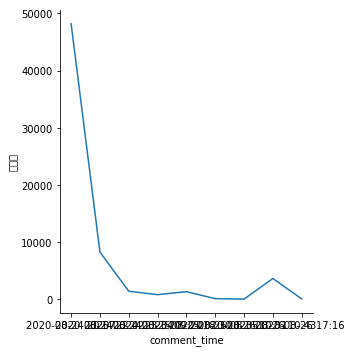

In [72]:
sns.relplot(x="comment_time", y="转发数", kind="line", data=merge_df, ci=None)
plt.show()

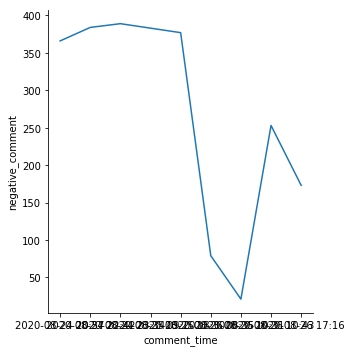

In [71]:
sns.relplot(x="comment_time", y="negative_comment", kind="line", data=merge_df, ci=None)
plt.show()

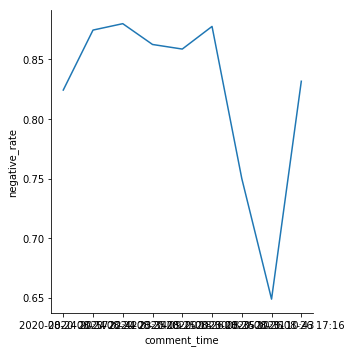

In [75]:
merge_df['negative_rate'] = merge_df['negative_comment'] / (merge_df['negative_comment'] + merge_df['positive_comment'])
sns.relplot(x="comment_time", y="negative_rate", kind="line", data=merge_df, ci=None)
plt.show()

In [85]:
merge_df[merge_df['negative_rate'] == merge_df['negative_rate'].min()]['正文'].tolist()[0]

'【#踹伤猥亵男男生被解除刑拘#，父亲：26日凌晨到家今天吃团圆饭】“孩子26日凌晨1点到的家，今天全家吃团圆饭！”8月26日上午，@东方今报 记者采访时，湖南永州“踹伤猥亵男男生”胡林（化名）的父亲胡师君语带兴奋。此前有消息称，湖南永州市公安局已责令冷水滩分局撤销案件，立即解除对胡某某的刑事拘留，提级由市公安局重新调查。8月26日，据永州新闻网消息，记者从永州市公安局获悉，对近日网民关注的“男学生踹伤猥亵男”案，该局高度重视，已责令冷水滩分局撤销案件，立即解除对胡某某的刑事拘留，提级由市公安局重新调查。对雷某某猥亵他人的违法行为，冷水滩分局依据《中华人民共和国治安管理处罚法》处行政拘留15日。这一消息，@东方今报 记者从男生父亲胡师君处确认此事。胡师君介绍，儿子胡林于26日凌晨1点多到的家，今早（26日）在家吃的早饭，准备全家吃顿团圆饭。“孩子一切都好，我特别高兴。”胡师君表示，他很期待永州市公安局提级调查。此前8月24日、25日，猛犸新闻·东方今报曾连续报道，湖南永州17岁女生李爱（化名）在商场遭52岁雷某某袭胸猥亵，同行18岁男生胡林（化名）阻止雷某某逃跑时将其踹伤，之后男生胡林因涉嫌“故意伤害罪”被警方刑拘。（猛犸新闻·东方今报记者 赵丹） #永州公安重新调查男子踹伤猥亵男案#'

## 还能做些什么改进？

### 微博下的每条评论并不是同等重要的，评论会有点赞数表示有多少人支持他，可以在计算情感倾向时加入点赞数权重

In [95]:
positive_weights = [comments[comments['senta_sentiments'] == 'positive']['评论获赞数'].sum() for comments in all_comments]
negative_weights = [comments[comments['senta_sentiments'] == 'negative']['评论获赞数'].sum() for comments in all_comments]

In [96]:
weight_df = pd.merge(user_weibo_topic, pd.DataFrame(data={'bid':bids, 'positive_comment':positive_weights, 'negative_comment': negative_weights , "comment_time":min_comment_times}), on='bid')
weight_df

,id,bid,正文,头条文章url,原始图片url,视频url,位置,日期,工具,点赞数,评论数,转发数,话题,@用户,positive_comment,negative_comment,comment_time
0,4542220781233735,JhIm25aWX,【解除刑拘！不能让防卫者缩手缩脚】今天（8月26日）有媒体报道说，湖南省永州市冷水滩公安分局...,NaN,https://wx2.sinaimg.cn/large/63b09f89ly1gi4by9...,NaN,NaN,2020-08-26 18:02:30,iPhone客户端,1665,296,60,"踹伤猥亵男男生被解除刑拘,被刑拘男同学父亲痛哭发声",NaN,54,1233,2020-08-26 17:16
1,4542121832621835,JhFMrb03F,【#踹伤猥亵男男生被解除刑拘#，父亲：26日凌晨到家今天吃团圆饭】“孩子26日凌晨1点到的家...,NaN,https://wx3.sinaimg.cn/large/63b09f89ly1gi40jc...,NaN,NaN,2020-08-26 15:02:41,iPhone客户端,107284,3738,3630,"踹伤猥亵男男生被解除刑拘,永州公安重新调查男子踹伤猥亵男案","东方今报,东方今报",16016,63,2020-08-26 10:43
2,4542118993082750,JhFHRcVXM,【#父亲谈踹伤猥亵男的男生现状#：已回家 身体状况良好】8月26日，永州市公安局通报，已责令...,NaN,NaN,http://f.video.weibocdn.com/1QdjDITvlx07FVLNYr...,NaN,2020-08-26 15:02:41,深度报道 · 视频社区,451,29,21,"父亲谈踹伤猥亵男的男生现状,永州公安重新调查男子踹伤猥亵男案",紧急呼叫,34,361,2020-08-26 10:31
3,4542089927073056,JhEWYtG1y,【#永州公安重新调查男子踹伤猥亵男案#，#踹伤猥亵男男生被解除刑拘#】据永州新闻网，记者从永...,NaN,https://wx3.sinaimg.cn/large/63b09f89ly1gi3wxn...,NaN,NaN,2020-08-26 15:02:41,Android,1028,106,103,"永州公安重新调查男子踹伤猥亵男案,踹伤猥亵男男生被解除刑拘",NaN,5,1163,2020-08-26 08:35
4,4541876629930049,JhzoWFFg5,【#被刑拘男同学父亲痛哭发声#：担心儿子前途，后悔没有答应赔偿】近日，湖南永州，17岁女生李...,NaN,NaN,http://f.video.weibocdn.com/qHxQJS4plx07FUN6PI...,NaN,2020-08-25 12:00:00,微博视频,28117,1915,1320,被刑拘男同学父亲痛哭发声,东方今报,78,7122,2020-08-25 18:30
5,4541738531957869,JhvOd8dkx,【#警方通报男生踢伤猥亵男被刑拘#：故意伤害案】据@冷水滩公安 ：8月21日，湖南永州冷水滩...,NaN,https://wx4.sinaimg.cn/large/63b09f89ly1gi2skh...,NaN,NaN,2020-08-25 12:00:00,iPhone客户端,23879,1439,801,NaN,冷水滩公安,74,8647,2020-08-25 09:20
6,4541590288474761,JhrX6zyFH,【#男生踹伤猥亵女生男子被刑拘# 警方：猥亵男受伤是事实】#警方回应踹伤猥亵男遭刑拘# 湖南...,NaN,NaN,https://gslb.miaopai.com/stream/Ys~aqQ3ZRTmN3M...,NaN,2020-08-24 12:00:00,iPhone客户端,26440,1991,1399,NaN,一手Video,57,4781,2020-08-24 23:34
7,4541577172888033,JhrBXc7jb,【#男生踹伤猥亵女生男子被刑拘#，警方：故意伤害罪，非见义勇为】近日，湖南永州。女生在商场被...,NaN,https://wx3.sinaimg.cn/large/63b09f89ly1gi2a24...,NaN,NaN,2020-08-24 12:00:00,iPhone客户端,145706,8890,8260,NaN,NaN,228,22616,2020-08-24 22:42
8,4541524001432649,Jhqec60Hf,【#男生踹伤猥亵女生男子被刑拘#，当事女生哭诉：对不起同学，你本该被表扬】6月1日，湖南永州...,NaN,https://wx4.sinaimg.cn/large/63b09f89ly1gi23th...,NaN,NaN,2020-08-24 12:00:00,iPhone客户端,523743,18268,48209,NaN,东方今报,2444,2303,2020-08-24 20:57


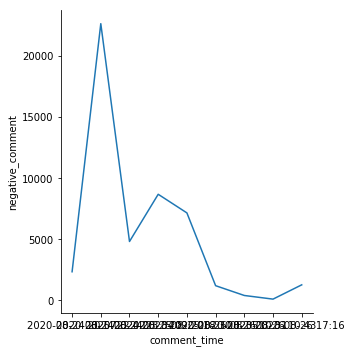

In [97]:
sns.relplot(x="comment_time", y="negative_comment", kind="line", data=weight_df, ci=None)
plt.show()

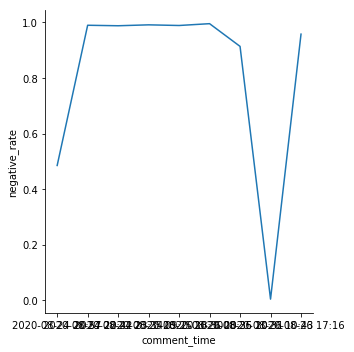

In [98]:
weight_df['negative_rate'] = weight_df['negative_comment'] / (weight_df['negative_comment'] + weight_df['positive_comment'])
sns.relplot(x="comment_time", y="negative_rate", kind="line", data=weight_df, ci=None)
plt.show()